<a href="https://colab.research.google.com/github/Aldarion96/Projects/blob/main/Online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np

df_retail = pd.read_excel (r'/content/sample_data/Online Retail.xlsx')
print (df_retail)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[541909 rows x 8 columns]


**Úprava datasetu:**

*čištění*
-řádky s Description pouze znaky,atd., lowercase
- prázdné pole Description s nulovou cenou
- A = Adjust bad debt
- C = zrušené nákupy (10 000 řádků)

*Vytvořit*
- sloupec flag
-sloupec profit (quantity * price)



*Vizualizace*
- jaký produkt se nakupuje nejvíce
 - celkový profit/ztráta / za kvartál
 

**Identifikování chybějících dat**

In [303]:
print(df_retail.info())
print(df_retail.dtypes)
print(df_retail.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
(541909, 8)


In [304]:
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Kolik % dat chybí v jednotlivých řádcích

In [305]:
for column in df_retail.columns:
    percentage = df_retail[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

InvoiceNo: 0.0%
StockCode: 0.0%
Description: 0.27%
Quantity: 0.0%
InvoiceDate: 0.0%
UnitPrice: 0.0%
CustomerID: 24.93%
Country: 0.0%


**Čištění**

*Duplicitiní hodnoty*

In [306]:
shape_a = df_retail.drop_duplicates()
shape_a = shape_a.shape
shape_b = df_retail.shape

duplicates=shape_b[0]-shape_a[0]
print(shape_a)
print(shape_b )
print(duplicates)


(536641, 8)
(541909, 8)
5268


In [307]:
clear_df = df_retail.drop_duplicates()

Čištění podle klíčových slov

In [ ]:
clear_df = df_retail[~df_retail.Description.str.contains("\?|wrong|damage|crushed|missing|destroyed|lost|mouldy|wet|thrown|smashed|check|Dotcom|Printing|broken|counted|problem|away|ebay|incorrect", na=False,case=False)]


**Odstranění v sloupci Description**

- vytvoření pomocného listu s LowerCase slovy
- ponecháme pouze názvy produktů

In [ ]:
clear_df = df_retail.drop_duplicates()

clear_df = df_retail[~df_retail.Description.str.contains("\?|wrong|damage|crushed|missing|destroyed|lost|mouldy|wet|thrown|smashed|check|Dotcom|Printing|broken|counted|problem|away|ebay|incorrect|20713", na=False,case=False)]



my_list = clear_df['Description'].str.extractall(r'(\b[a-z]+\b)')[0].tolist()
my_list = list(dict.fromkeys(my_list))

clear_df = clear_df[~clear_df['Description'].str.contains('|'.join(my_list),na=False)]

In [ ]:
print(clear_df.shape)
print(aclear_df.shape)

**1. Jaký produkt se prodává nejvíce:**

Podle počtu nákupů

In [ ]:
sells_df = clear_df.assign(sells = 1)
sells_df = sells_df[['Description','sells']].groupby(['Description']).count().sort_values('sells',ascending = False)

Prvních a posledních 5 

In [ ]:
sells_df.iloc[np.r_[0:5, -5:0]]

**GRAF**

In [ ]:
df = sells_df.reset_index()
df = df.astype({"sells": int, "Description": str})

In [ ]:
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(df['Description'], df['sells'], edgecolor='blue', alpha=0.75)
ax.set_title('Prodeje zboží - kolikrát bylo zboží prodáno')
ax.set_ylabel('počet prodejů')
ax.grid()
ax.xaxis.set_visible(False)

Histogram

In [ ]:
fig, ax = plt.subplots(figsize=(25,12))
plt.hist(df['sells'])
ax.set_title('Prodeje zboží - kolikrát bylo zboží prodáno')
ax.set_ylabel('počet prodejů')
ax.set_xlabel('počet produktů')
ax.grid()
plt.show()

podle počtu prodaných kusů

In [ ]:
sells_df2 = clear_df[['Description','Quantity']].groupby(['Description']).sum().sort_values('Quantity',ascending = False)


In [ ]:
sells_df2.iloc[np.r_[0:5, -5:0]]

**GRAF**

In [ ]:
df2 = sells_df2.reset_index()
df2 = df2.astype({"Quantity": int, "Description": str})


In [ ]:
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(df2['Description'], df2['Quantity'], edgecolor='red', alpha=0.75)
ax.set_title('Prodeje zboží - kolikrát bylo zboží prodáno')
ax.set_ylabel('počet prodejů')
ax.grid()
ax.xaxis.set_visible(False)

Histogram

In [ ]:
fig, ax = plt.subplots(figsize=(25,12))
plt.hist(df2['Quantity'],bins=10,color='red')
ax.set_title('Prodeje zboží - kolikrát bylo zboží prodáno')
ax.set_ylabel('počet produktů')
ax.set_xlabel('počet prodejů na kusy')
ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.grid()
plt.show()

**Ve které zemi se prodává nejvíce**

**Vytvoření pomocných sloupců.**


- **total** = celkový výnos/ztráta
- **flag** = počet zakoupení
- **quantity** = čeho se prodalo nejvíce / nejméně




In [ ]:
df_countries = df_retail[['Country']].assign(sells = 1).groupby('Country').count().sort_values('sells',ascending = False)
df_countries['percent'] = round((df_countries['sells']  / df_countries['sells'].sum()*100),2)
df_countries.head()

**Zisk / Ztráta**

Tabulka s vypočítanou ziskovostí či ztrátovostí

In [ ]:
df_profit = df_retail.assign(total = (df_retail.Quantity * df_retail.UnitPrice))
df_profit.head(3)


In [ ]:
df_profit = df_profit[['Description','StockCode','total']].groupby(['StockCode','Description']).sum().sort_values('total',ascending = False)

In [ ]:
df_profit_Stock = df_profit.query("total != 0").sort_values('total', ascending = False)
df_profit_Stock = df_profit_Stock.query("total > 0") 
df_profit_Stock

**Bilance za dny/měsíce/kvartály za rok 2011** 

In [ ]:
df_days = df_retail.assign(total = (df_retail.Quantity * df_retail.UnitPrice))

In [ ]:
df_days = df_days.query("InvoiceDate >= '2011-01-01'")

In [ ]:
df_days.index = pd.to_datetime(df_days['InvoiceDate'],format='%m/%d/%y %I:%M%p')

In [ ]:
df_days = df_days[['total']].groupby(pd.Grouper(freq='d')).sum().sort_values('InvoiceDate')
df_days

In [ ]:
df3 = df_days.reset_index()
df3

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(df3['InvoiceDate'], df3['total'])
ax.set_title('Denní tržby v průběhu roku',fontsize=20)
ax.set_ylabel('tržby',fontsize=14)
ax.grid(alpha=0.25)

In [ ]:
df_months = df_days.query("InvoiceDate >= '2011-01-01'")
df_months = df_months[['total']].groupby(pd.Grouper(freq='m')).sum().sort_values('InvoiceDate')
df_months

**GRAF**

In [332]:
months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

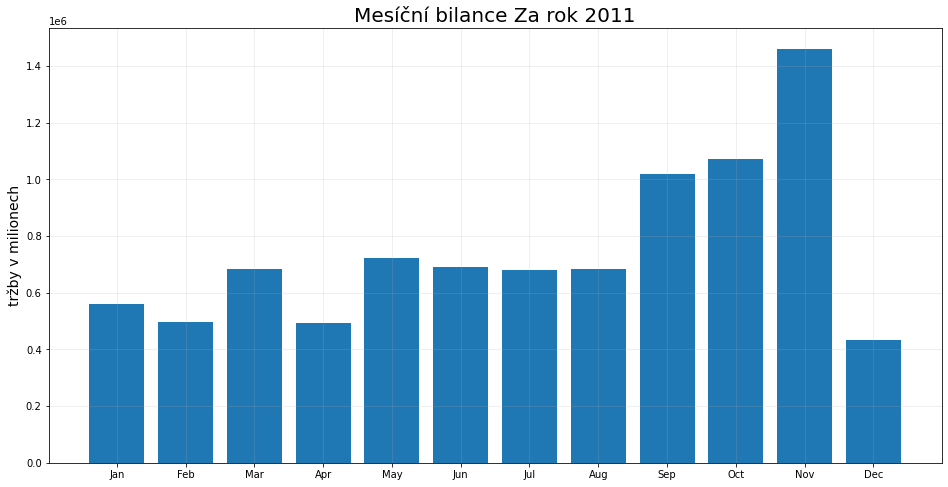

In [333]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(months_list, df_months['total'])
ax.set_title('Mesíční bilance Za rok 2011',fontsize=20)
ax.set_ylabel('tržby v milionech',fontsize=14)
ax.grid(alpha=0.25)

In [334]:
df_quartal = df_days.query("InvoiceDate >= '2011-01-01'")

In [335]:
df_quartal = df_quartal[['total']].groupby(pd.Grouper(freq='q')).sum().sort_values('InvoiceDate')

In [336]:
q = ['1.kvartál','2.kvartál','3.kvartál','4.kvartál']

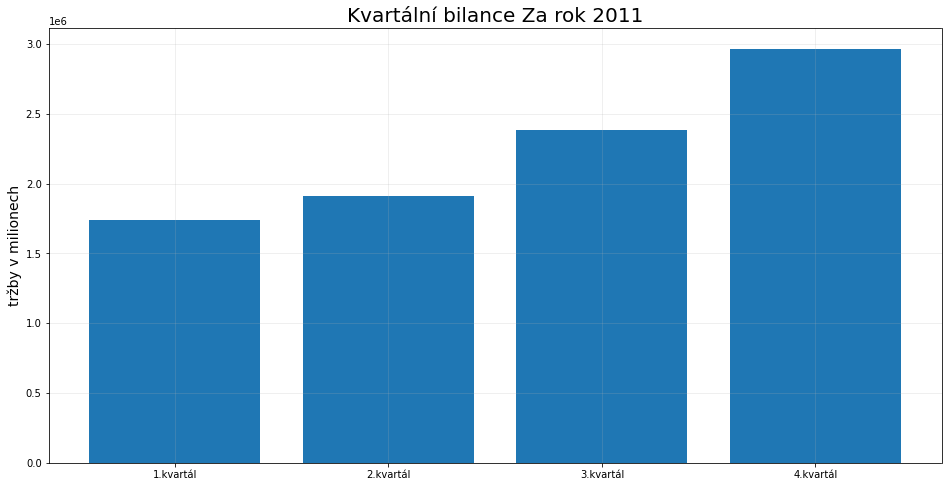

In [337]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(q, df_quartal['total'])
ax.set_title('Kvartální bilance Za rok 2011',fontsize=20)
ax.set_ylabel('tržby v milionech',fontsize=14)
ax.grid(alpha=0.25)